# Big Mart

In [838]:
# Importing Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [839]:
# Importing Both Train and Test Data:
# Here, We are importing Both Train and test Data so that we can combine both dataframes for EDA and Data Cleaning.
# We will later seperate the data again.
# We will train and test models using train data and use test dataset to make predictions on.

train = pd.read_csv("bigmart_train.csv")
test = pd.read_csv("bigmart_test.csv")

#### Exploring and Combining Train and Test Data:

In [840]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [841]:
train.shape

(8523, 12)

In [842]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [843]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [844]:
test.shape

(5681, 11)

In [845]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [846]:
# 'Item_Outlet_Sales' is in Train Data and not in Test Data.

# 'Item_Outlet_Sales' is our Target Variable.

In [847]:
# Combining Two Dataframes:

df = pd.concat([train, test]) 

In [848]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [849]:
df.shape

(14204, 12)

In [850]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [851]:
# Exploring The Data:

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [852]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


#### Missing Value Treatment:

In [853]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

In [854]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [855]:
# Here, We have 5681 Missing Values in "Item_Outlet_Sales" column.
# Note that these 5681 values are missing because those rows came from Test Data.
# So, we don't have to fill missing values in "Item_Outlet_Sales"

In [856]:
# For "Item_Weight Column":

In [857]:
df["Item_Weight"]

0        9.30
1        5.92
2       17.50
3       19.20
4        8.93
        ...  
5676    10.50
5677     7.60
5678    10.00
5679    15.30
5680     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [858]:
# This is a continuos variable.
# We can Fill Missing Values using Mean.

In [859]:
df["Item_Weight"].mean()

12.792854228644991

In [860]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [861]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

In [862]:
# For "Outlet_Size" Column:

In [863]:
df["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 14204, dtype: object

In [864]:
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [865]:
# This is a Categorical variable.
# We can Fill Missing Values using Mode.

In [866]:
df["Outlet_Size"].mode()

0    Medium
dtype: object

In [867]:
df["Outlet_Size"].mode()[0]

'Medium'

In [868]:
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [869]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

#### Data Cleaning:

In [870]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [871]:
# We can Convert "Outlet_Establishment_Year" in Age of outlet to make it more useful

In [872]:
df["Outlet_Age"] = 2022- df["Outlet_Establishment_Year"]

In [873]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [874]:
# We can Drop "Outlet_Establishment_Year" now
df = df.drop("Outlet_Establishment_Year", axis= 1)

In [875]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


<Figure size 720x576 with 0 Axes>

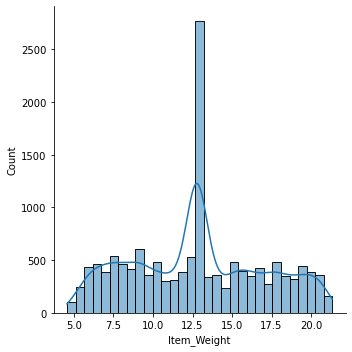

In [876]:
# Checking Distribution of Each Column:

plt.figure(figsize= (10,8))

sns.displot(df["Item_Weight"], kde= True)

plt.show()

<Figure size 720x576 with 0 Axes>

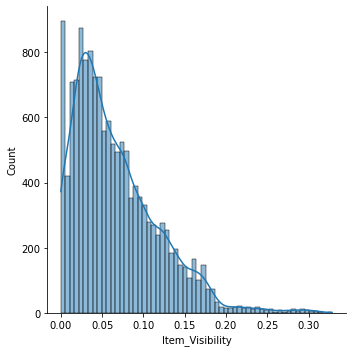

In [877]:
plt.figure(figsize= (10,8))

sns.displot(df["Item_Visibility"], kde= True)

plt.show()

<Figure size 720x576 with 0 Axes>

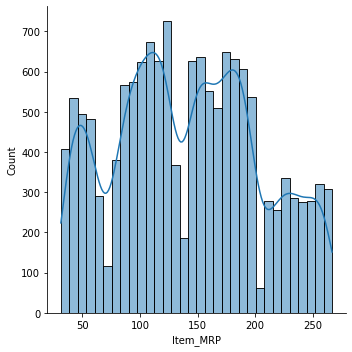

In [878]:
plt.figure(figsize= (10,8))

sns.displot(df["Item_MRP"], kde= True)

plt.show()

<Figure size 720x576 with 0 Axes>

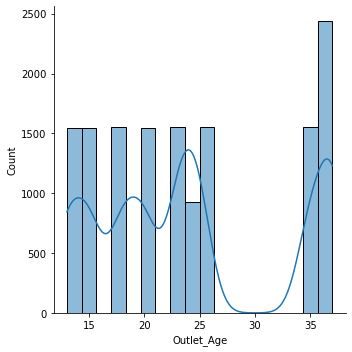

In [879]:
plt.figure(figsize= (10,8))

sns.displot(df["Outlet_Age"], kde= True)

plt.show()

<Figure size 720x576 with 0 Axes>

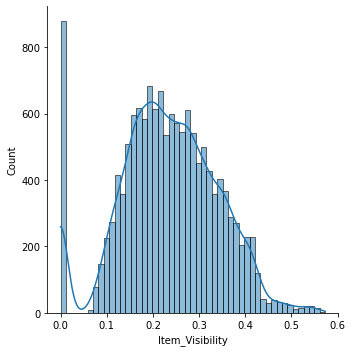

In [880]:
# "Item_Visibility" distribution Seems Skewed.

# We can Try Log or Square Root Transformation to make it close to Normal Distribution

plt.figure(figsize= (10,8))

sns.displot(df["Item_Visibility"].apply(np.sqrt), kde= True)

plt.show()

In [881]:
df["Item_Visibility"] = df["Item_Visibility"].apply(np.sqrt)

In [882]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.138846,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


In [883]:
# We will Apply Scalling After Combining Numeric And Object Data.

In [884]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.138846,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


In [885]:
df["Item_Identifier"].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [886]:
# We can Convert this column into categorical by converting Items with FD = Food, DR = Drink and NC = Non-Consumable

In [887]:
df["Item_Identifier"].apply(lambda x : x[:2])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Identifier, Length: 14204, dtype: object

In [888]:
df["Item_Identifier"] = df["Item_Identifier"].apply(lambda x : x[:2])

In [889]:
df["Item_Identifier"]

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Identifier, Length: 14204, dtype: object

In [890]:
df["Item_Identifier"].map({"FD": "Food", "DR": "Drink", "NC": "Non-Consumable"})

0                 Food
1                Drink
2                 Food
3                 Food
4       Non-Consumable
             ...      
5676              Food
5677              Food
5678    Non-Consumable
5679              Food
5680              Food
Name: Item_Identifier, Length: 14204, dtype: object

In [891]:
df["Item_Identifier"] = df["Item_Identifier"].map({"FD": "Food", "DR": "Drink", "NC": "Non-Consumable"})

In [892]:
df["Item_Identifier"]

0                 Food
1                Drink
2                 Food
3                 Food
4       Non-Consumable
             ...      
5676              Food
5677              Food
5678    Non-Consumable
5679              Food
5680              Food
Name: Item_Identifier, Length: 14204, dtype: object

In [893]:
df["Item_Identifier"].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Identifier, dtype: int64

In [894]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [895]:
# We can see that Low Fat, LF and low fat is same category
# Also, Regular and reg is same.

# We can Convert Replace These Mis-Typed Values

In [896]:
df["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat")

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
5676    Regular
5677    Regular
5678    Low Fat
5679    Regular
5680    Regular
Name: Item_Fat_Content, Length: 14204, dtype: object

In [897]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(["reg"],"Regular")

In [898]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [899]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [900]:
df["Outlet_Identifier"].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [901]:
df["Outlet_Size"].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [902]:
df["Outlet_Location_Type"].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [903]:
df["Outlet_Type"].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [904]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,Food,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,Drink,5.92,Regular,0.138846,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,Food,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,24
4,Non-Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


#### Creating Dummy Variables for Categorical Columns:

In [905]:
df.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Outlet_Age                int64
dtype: object

In [906]:
df = pd.get_dummies(df, columns= ["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier",
                            "Outlet_Size","Outlet_Location_Type","Outlet_Type"], drop_first= True)

In [907]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.126678,249.8092,3735.1380,23,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.138846,48.2692,443.4228,13,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.129461,141.6180,2097.2700,23,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,24,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,35,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [908]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Identifier_Food', 'Item_Identifier_Non-Consumable',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type

In [909]:
df.shape

(14204, 39)

#### Scalling:

In [910]:
# First, we will divide Train and Test Data that we combined for EDA and Data Cleaning.

# We can Seperate Data by 'Item_Outlet_Sales' column as all the rows of Test Data Will have NaN in 'Item_Outlet_Sales'.

In [911]:
df[df['Item_Outlet_Sales'].isna() == True]

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.086976,107.8622,NaN,23,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,8.300000,0.196030,87.3198,NaN,15,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,14.600000,0.315555,241.7538,NaN,24,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,7.315000,0.124050,155.0340,NaN,15,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,12.792854,0.344383,234.2300,NaN,37,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.116174,141.3154,NaN,25,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
5677,7.600000,0.378141,169.1448,NaN,13,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
5678,10.000000,0.271162,118.7440,NaN,20,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
5679,15.300000,0.000000,214.6218,NaN,15,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0


In [912]:
df[df['Item_Outlet_Sales'].isna() == False]

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.126678,249.8092,3735.1380,23,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.138846,48.2692,443.4228,13,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0.129461,141.6180,2097.2700,23,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,24,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,35,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.238293,214.5218,2778.3834,35,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.216754,108.1570,549.2850,20,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
8520,10.600,0.187580,85.1224,1193.1136,18,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.381078,103.1332,1845.5976,13,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [913]:
final_train = df[df['Item_Outlet_Sales'].isna() == False]
final_test = df[df['Item_Outlet_Sales'].isna() == True]

In [914]:
final_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.126678,249.8092,3735.1380,23,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.138846,48.2692,443.4228,13,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0.129461,141.6180,2097.2700,23,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,24,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,35,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.238293,214.5218,2778.3834,35,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.216754,108.1570,549.2850,20,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
8520,10.600,0.187580,85.1224,1193.1136,18,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.381078,103.1332,1845.5976,13,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [915]:
final_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.086976,107.8622,NaN,23,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,8.300000,0.196030,87.3198,NaN,15,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,14.600000,0.315555,241.7538,NaN,24,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,7.315000,0.124050,155.0340,NaN,15,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,12.792854,0.344383,234.2300,NaN,37,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.116174,141.3154,NaN,25,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
5677,7.600000,0.378141,169.1448,NaN,13,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
5678,10.000000,0.271162,118.7440,NaN,20,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
5679,15.300000,0.000000,214.6218,NaN,15,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0


In [916]:
# Scalling:

sc= StandardScaler()

In [917]:
temp = sc.fit_transform(final_train)

In [918]:
final_train = pd.DataFrame(temp, index= final_train.index, columns= final_train.columns)

In [919]:
final_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.839226,-0.997548,1.747454,0.910601,-0.139541,0.625708,-0.480558,-0.738147,-0.174193,-0.114346,...,-0.349762,-0.349973,2.857362,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
1,-1.639047,-0.884139,-1.489023,-1.018440,-1.334103,-1.598190,-0.480558,1.354743,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,2.860816,-0.351028
2,1.101168,-0.971612,0.010040,-0.049238,-0.139541,0.625708,-0.480558,-0.738147,-0.174193,-0.114346,...,-0.349762,-0.349973,2.857362,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
3,1.503445,-2.178206,0.660050,-0.849103,-0.020085,0.625708,-0.480558,1.354743,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,-0.349551,-0.351028
4,-0.926780,-2.178206,-1.399220,-0.695373,1.293934,-1.598190,2.080915,-0.738147,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,-1.251866,-0.623893,-0.696678,1.242650,0.726802,-0.349551,-0.351028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.415428,0.042719,1.180783,0.349915,1.293934,0.625708,-0.480558,-0.738147,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,-1.251866,-0.623893,-0.696678,1.242650,0.726802,-0.349551,-0.351028
8519,-1.056929,-0.158022,-0.527301,-0.956402,-0.497909,0.625708,-0.480558,1.354743,-0.174193,-0.114346,...,2.859087,-0.349973,-0.349973,0.798807,-0.623893,1.435383,-0.804732,0.726802,-0.349551,-0.351028
8520,-0.531602,-0.429930,-0.897208,-0.579100,-0.736822,-1.598190,2.080915,-0.738147,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,-1.251866,1.602840,1.435383,-0.804732,0.726802,-0.349551,-0.351028
8521,-1.333790,1.373504,-0.607977,-0.196725,-1.334103,0.625708,-0.480558,1.354743,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,2.860816,-0.351028


In [920]:
temp = sc.transform(final_test)

In [921]:
final_test = pd.DataFrame(temp, index= final_test.index, columns= final_test.columns)

In [922]:
final_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.870226,-1.367575,-0.532035,NaN,-0.139541,0.625708,-0.480558,-0.738147,-0.174193,-0.114346,...,-0.349762,-0.349973,2.857362,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
1,-1.075859,-0.351177,-0.861920,NaN,-1.095190,0.625708,-0.480558,1.354743,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,1.435383,-0.804732,0.726802,-0.349551,-0.351028
2,0.414931,0.762816,1.618094,NaN,-0.020085,-1.598190,2.080915,-0.738147,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,-0.349551,-0.351028
3,-1.308943,-1.022041,0.225484,NaN,-1.095190,0.625708,-0.480558,-0.738147,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,1.435383,-0.804732,0.726802,-0.349551,-0.351028
4,-0.012700,1.031493,1.497272,NaN,1.532846,0.625708,-0.480558,1.354743,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,-0.349551,2.848773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.555266,-1.095443,0.005181,NaN,0.099372,0.625708,-0.480558,1.354743,-0.174193,-0.114346,...,-0.349762,2.857362,-0.349973,-1.251866,1.602840,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
5677,-1.241503,1.346131,0.452086,NaN,-1.334103,0.625708,-0.480558,1.354743,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,2.860816,-0.351028
5678,-0.673583,0.349062,-0.357287,NaN,-0.497909,-1.598190,2.080915,-0.738147,-0.174193,-0.114346,...,2.859087,-0.349973,-0.349973,0.798807,-0.623893,1.435383,-0.804732,0.726802,-0.349551,-0.351028
5679,0.580574,-2.178206,1.182389,NaN,-1.095190,0.625708,-0.480558,1.354743,-0.174193,-0.114346,...,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,1.435383,-0.804732,0.726802,-0.349551,-0.351028


In [923]:
# Dropping "Item_Outlet_Sales" from final_test

final_test = final_test.drop("Item_Outlet_Sales", axis= 1)

## Models:

In [924]:
# Features:
x = final_train.drop("Item_Outlet_Sales", axis= 1)

In [925]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.839226,-0.997548,1.747454,-0.139541,0.625708,-0.480558,-0.738147,-0.174193,-0.114346,-0.287094,...,-0.349762,-0.349973,2.857362,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
1,-1.639047,-0.884139,-1.489023,-1.334103,-1.598190,-0.480558,1.354743,-0.174193,-0.114346,-0.287094,...,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,2.860816,-0.351028
2,1.101168,-0.971612,0.010040,-0.139541,0.625708,-0.480558,-0.738147,-0.174193,-0.114346,-0.287094,...,-0.349762,-0.349973,2.857362,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
3,1.503445,-2.178206,0.660050,-0.020085,0.625708,-0.480558,1.354743,-0.174193,-0.114346,-0.287094,...,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,-0.349551,-0.351028
4,-0.926780,-2.178206,-1.399220,1.293934,-1.598190,2.080915,-0.738147,-0.174193,-0.114346,-0.287094,...,-0.349762,-0.349973,-0.349973,-1.251866,-0.623893,-0.696678,1.242650,0.726802,-0.349551,-0.351028


In [926]:
# Target:
y = final_train["Item_Outlet_Sales"]

In [927]:
y.head

<bound method NDFrame.head of 0       0.910601
1      -1.018440
2      -0.049238
3      -0.849103
4      -0.695373
          ...   
8518    0.349915
8519   -0.956402
8520   -0.579100
8521   -0.196725
8522   -0.829594
Name: Item_Outlet_Sales, Length: 8523, dtype: float64>

In [928]:
# Train Test Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [929]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5966, 38)
(2557, 38)
(5966,)
(2557,)


### 1) Linear Regression:

In [930]:
lr = LinearRegression()

In [931]:
lr.fit(x_train, y_train)

LinearRegression()

In [932]:
pred = lr.predict(x_test)

In [933]:
r2_score(y_test, pred)

0.5676949576856543

In [934]:
np.sqrt(mean_squared_error(y_test, pred))

0.6448674965732406

In [935]:
mean_absolute_error(y_test, pred)

0.4750328827861752

### 2) Elastic Net Using Grid Search:

In [936]:
ENT = ElasticNet()

In [937]:
param_dict = {"alpha" : [0.001, 0.01, 0.1, 1, 10, 100],
             "l1_ratio" : [0.1, 0.25, 0.5, 0.75, 0.95, 1]}

In [938]:
grid_model = GridSearchCV(estimator= ENT, param_grid= param_dict, scoring= "r2", cv= 10)

In [939]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.95, 1]},
             scoring='r2')

In [940]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.190391,2.163306e-02,0.002095,5.372114e-04,0.001,0.1,"{'alpha': 0.001, 'l1_ratio': 0.1}",0.570655,0.570199,0.556719,0.546151,0.560200,0.528178,0.582302,0.558488,0.545540,0.543258,0.556169,0.015083,11
1,0.159972,1.444715e-02,0.001895,2.991997e-04,0.001,0.25,"{'alpha': 0.001, 'l1_ratio': 0.25}",0.570766,0.570281,0.556972,0.546288,0.560200,0.528263,0.582422,0.558447,0.545599,0.543297,0.556253,0.015091,9
2,0.161867,2.370689e-02,0.001795,3.990055e-04,0.001,0.5,"{'alpha': 0.001, 'l1_ratio': 0.5}",0.570833,0.570357,0.557389,0.546557,0.560194,0.528382,0.582636,0.558419,0.545682,0.543400,0.556385,0.015089,8
3,0.222912,5.122799e-02,0.001995,3.277714e-07,0.001,0.75,"{'alpha': 0.001, 'l1_ratio': 0.75}",0.570886,0.570409,0.557722,0.546819,0.560209,0.528488,0.582847,0.558398,0.545764,0.543472,0.556501,0.015089,6
4,0.093550,1.291757e-02,0.001895,5.375748e-04,0.001,0.95,"{'alpha': 0.001, 'l1_ratio': 0.95}",0.570936,0.570479,0.557945,0.547011,0.560236,0.528560,0.583006,0.558378,0.545818,0.543513,0.556588,0.015097,4
5,0.085972,1.391306e-02,0.001794,4.009093e-04,0.001,1,"{'alpha': 0.001, 'l1_ratio': 1}",0.570948,0.570486,0.557990,0.547059,0.560244,0.528573,0.583047,0.558375,0.545831,0.543523,0.556608,0.015100,3
6,0.055751,6.858223e-03,0.001795,3.993159e-04,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.571459,0.570059,0.557791,0.546936,0.560213,0.528419,0.582744,0.557396,0.545584,0.543517,0.556412,0.015101,7
7,0.054953,7.429310e-03,0.001995,2.078485e-07,0.01,0.25,"{'alpha': 0.01, 'l1_ratio': 0.25}",0.571600,0.570046,0.558509,0.547869,0.560081,0.528985,0.583535,0.556754,0.545336,0.543657,0.556637,0.015101,2
8,0.047573,2.524810e-03,0.001695,4.570959e-04,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",0.571515,0.569783,0.559734,0.549196,0.559610,0.529196,0.584504,0.555666,0.545007,0.543117,0.556733,0.015220,1
9,0.065226,2.827975e-03,0.001995,3.053248e-07,0.01,0.75,"{'alpha': 0.01, 'l1_ratio': 0.75}",0.571089,0.569068,0.560637,0.549898,0.559361,0.529351,0.584861,0.554308,0.544064,0.542501,0.556514,0.015286,5


In [941]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.5}

In [942]:
grid_model.best_score_

0.5567327321148825

In [943]:
grid_model.best_estimator_.coef_

array([-0.00000000e+00, -1.80377998e-02,  5.68874222e-01, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.47935968e-02, -0.00000000e+00,
        0.00000000e+00,  8.41503051e-05, -1.13179095e-02, -1.90279876e-04,
        5.62065976e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.20981871e-02, -0.00000000e+00,
       -3.95317125e-04,  0.00000000e+00,  8.23420010e-03,  1.06618762e-02,
        1.30375711e-01, -1.58908604e-02,  2.91578730e-01,  1.60491923e-02,
       -9.01042847e-03, -0.00000000e+00,  1.48693210e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  4.93327561e-01,
        1.37941926e-01,  2.87617438e-01])

### 3) Ridge Using Grid Search:

In [944]:
ridge = Ridge(max_iter= 1000000)

In [945]:
param_dict = {"alpha" : [0.001, 0.01, 0.1, 1, 10, 100]}

In [946]:
rd_grid_model = GridSearchCV(estimator= ridge, param_grid= param_dict, scoring= "r2", cv= 10)

In [947]:
rd_grid_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(max_iter=1000000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [948]:
pd.DataFrame(rd_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005984,0.002601,0.002592,0.001850,0.001,{'alpha': 0.001},0.570476,0.570155,0.556463,0.546039,0.560182,0.528117,0.582223,0.558591,0.545495,0.543195,0.556094,0.015076,5
1,0.004687,0.000457,0.001596,0.000489,0.01,{'alpha': 0.01},0.570477,0.570155,0.556463,0.546040,0.560182,0.528117,0.582223,0.558591,0.545495,0.543195,0.556094,0.015076,4
2,0.004887,0.000698,0.001396,0.000489,0.1,{'alpha': 0.1},0.570478,0.570155,0.556465,0.546040,0.560182,0.528117,0.582223,0.558590,0.545496,0.543195,0.556094,0.015076,3
3,0.004289,0.000457,0.001695,0.000457,1,{'alpha': 1},0.570489,0.570150,0.556476,0.546047,0.560183,0.528115,0.582225,0.558577,0.545497,0.543199,0.556096,0.015076,2
4,0.004588,0.000489,0.001695,0.000457,10,{'alpha': 10},0.570593,0.570100,0.556578,0.546112,0.560190,0.528097,0.582233,0.558444,0.545512,0.543235,0.556109,0.015076,1
5,0.004389,0.000489,0.001695,0.000457,100,{'alpha': 100},0.571173,0.569207,0.556980,0.546332,0.559928,0.527590,0.581853,0.556757,0.545246,0.543159,0.555822,0.015069,6


In [949]:
rd_grid_model.best_params_

{'alpha': 10}

In [950]:
rd_grid_model.best_score_

0.5561093430511613

In [951]:
rd_grid_model.best_estimator_.coef_

array([-0.00391103, -0.01853467,  0.57630629,  0.04910129, -0.00957533,
       -0.00191211,  0.02163753, -0.00149792,  0.00216202,  0.00422188,
       -0.01718173, -0.00466204,  0.00938747, -0.00140731,  0.00098842,
       -0.00199128, -0.00228597, -0.00264053,  0.01792515, -0.00209605,
       -0.00882903,  0.00213004,  0.12181075,  0.06828279,  0.1601787 ,
       -0.11184859,  0.29401665,  0.02810892,  0.03025437,  0.04730765,
        0.11384048, -0.07088285, -0.00767994,  0.08409211, -0.12841706,
        0.26851372,  0.1601787 ,  0.29401665])

## 4) Lasso Using Grid Search:

In [952]:
ls = Lasso(max_iter= 1000000)

In [953]:
param_dict = {"alpha" : [0.001, 0.01, 0.1, 1, 10, 100]}

In [954]:
ls_grid_model = GridSearchCV(estimator= ls, param_grid= param_dict, scoring= "r2", cv= 10)

In [955]:
ls_grid_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=1000000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [956]:
pd.DataFrame(ls_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.084873,0.012153,0.001895,2.989770e-04,0.001,{'alpha': 0.001},0.570948,0.570486,0.557990,0.547059,0.560244,0.528573,0.583047,0.558375,0.545831,0.543523,0.556608,0.015100,1
1,0.010771,0.000399,0.001995,2.396077e-07,0.01,{'alpha': 0.01},0.570819,0.567831,0.561203,0.550175,0.558739,0.529702,0.584891,0.552875,0.543033,0.541942,0.556121,0.015263,2
2,0.006483,0.000920,0.001795,3.996022e-04,0.1,{'alpha': 0.1},0.486460,0.477975,0.476233,0.461951,0.481996,0.455157,0.496783,0.442015,0.462681,0.459465,0.470071,0.015708,3
3,0.005585,0.000662,0.001895,2.990961e-04,1,{'alpha': 1},-0.001984,-0.001767,-0.000054,-0.003021,-0.000262,-0.000265,-0.001522,-0.000685,-0.000861,-0.005834,-0.001626,0.001657,4
4,0.005785,0.000598,0.002094,5.371450e-04,10,{'alpha': 10},-0.001984,-0.001767,-0.000054,-0.003021,-0.000262,-0.000265,-0.001522,-0.000685,-0.000861,-0.005834,-0.001626,0.001657,4
5,0.005585,0.000662,0.001695,4.569864e-04,100,{'alpha': 100},-0.001984,-0.001767,-0.000054,-0.003021,-0.000262,-0.000265,-0.001522,-0.000685,-0.000861,-0.005834,-0.001626,0.001657,4


In [957]:
ls_grid_model.best_params_

{'alpha': 0.001}

In [958]:
ls_grid_model.best_score_

0.5566078022482773

In [959]:
ls_grid_model.best_estimator_.coef_

array([-2.85595676e-03, -1.80056427e-02,  5.76091501e-01, -0.00000000e+00,
       -2.50966220e-03,  4.15409491e-05,  1.97734227e-02, -3.65389417e-04,
        1.29036680e-03,  3.47602935e-03, -1.54479907e-02, -3.62666091e-03,
        8.73457663e-03,  0.00000000e+00,  2.28903424e-03,  0.00000000e+00,
       -1.02380160e-03, -4.66918307e-04,  1.68343778e-02, -1.08065357e-03,
       -4.53389318e-03,  1.32228630e-03,  0.00000000e+00,  2.27349483e-03,
        0.00000000e+00, -2.06174389e-04,  3.09568510e-01,  7.40555374e-03,
       -2.49239570e-02, -1.47022712e-02,  6.47796135e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  5.50191282e-01,
        2.97501449e-01,  2.99713797e-01])

## Using Linear Regression for Test Data:

In [960]:
final_predictions = lr.predict(final_test)

In [961]:
final_predictions

array([-0.19642998, -0.42030693, -0.17798973, ..., -0.19740654,
        0.86729073, -0.52601982])